# 18 - Evaluación de modelos y mejoras

![](images/1.png)

## Módulo 6 - Aprendizaje de máquina supervisado
### Profesor: M.Sc. Favio Vázquez

In [1]:
from imports import *

Recordemos que la razón por la que separamos los datos en entrenamiento y prueba es que queremos que nuestros modelos generalicen bien ante datos no vistos. Es decir, no solo nos interesa cuan bien un modelo se ajusta a los datos de entrenamiento, sino que lo que nos más nos importa es que los modelos puedan hacer predicciones para datos que no fueron observados en la fase de entrenamiento. 

En este notebook veremos dos aspectos de esta evaluación, primero introduciremos el **cross-validation**, que es una forma robusta de asegurar la generalización de los modelos, y luego veremos el **grid search**, que es un método efectivo para ajustar los hiper-parámetros de los modelos que también ayuda en su generalización pero principalmente ayuda a encontrar el mejor modelo posible

## Cross-Validation

El cross-validation es método estadístico para evaluar el performance con respecto a la generalización de los modelos, y es un paso **obligatorio** luego de hacer el método de la exclusión.

La variante más utilizada de cross-validation se llama **k-fold cross-validation**, donde $k$ es un número especificado por el usuario comúnmente entre 5 y 10. 

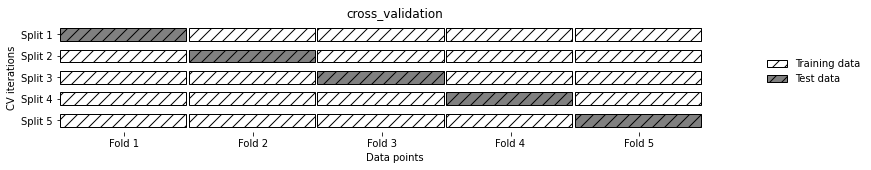

In [2]:
# K-fold cross-validation con k=5
mglearn.plots.plot_cross_validation()

### Cross-validation en scikit-learn

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [4]:
iris = load_iris()

La forma más simple de hacer cross-validation con sklearn es a partir de la función `cross_val_score`, en este caso esta función recibe el modelo que queremos evaluar, los datos de entrenamiento y la variable target original.

In [7]:
logreg = LogisticRegression()
scores = cross_val_score(estimator = logreg, 
                         X = iris.data, 
                         y = iris.target)

In [8]:
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.967 1.    0.933 0.967 1.   ]


Por defecto, `cross_val_scores` hace un 5-fold cross-validation y me entrega 5 accuracies, una para cada fold. Pero es posible cambiar el número de folds:

In [9]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=3)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.98 0.96 0.98]


In [10]:
print("El score promedio del cross-validation es: {}".format(scores.mean()))

El score promedio del cross-validation es: 0.9733333333333333


La principal desventaja del cross-validation es que es muy caro computacionalmente, por lo tanto comúnmente para casos realistas se utilizan librerías de ML distribuído y clusters de datos.

### Stratified k-fold cross validation

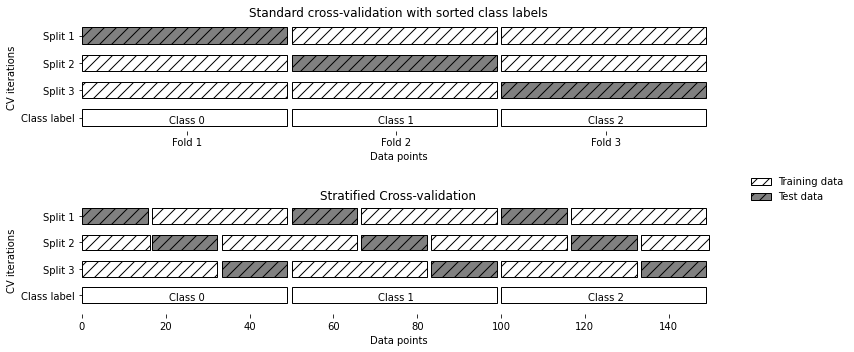

In [11]:
mglearn.plots.plot_stratified_cross_validation()

No siempre es una buena idea partir los datos en k-partes. Por ejemplo veamos el dataset de iris:

In [12]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Si hacemos un k-fold normal, no estaríamos capturando la realidad del dataset, debido a que la cantidad de valores de una clase en el training y el set para cada split sería diferente. Lo cual no es muy eficiente. 

Por lo tanto, en el stratified cross-validation, hacemos la partición de los datos, de manera que las proporciones entre las clases sea la misma para cada fold como lo son en el dataset original.

## K-fold

In [13]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [14]:
logreg = LogisticRegression()
scores = cross_val_score(logreg, iris.data, iris.target, cv=kfold)

In [15]:
scores

array([1.   , 1.   , 0.867, 0.933, 0.833])

In [16]:
# Esto es un problema que pide hacer un stratified k-fold o algo así
kfold = KFold(n_splits=3)
logreg = LogisticRegression()
scores = cross_val_score(logreg, iris.data, iris.target, cv=kfold)
scores

array([0., 0., 0.])

In [17]:
# Haciendo un shuffle de los datos se puede resolver el problema
# de ordenado de clases en datos para clasificación
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
logreg = LogisticRegression()
scores = cross_val_score(logreg, iris.data, iris.target, cv=kfold)
scores

array([0.98, 0.96, 0.96])

## Shuffle-split cross-validation

En el shuffle-split cross-validation cada split de los datos es de un tamaño del train_size para el training set y del tamaño del test_size para el test set. El splitting se repite n_splits veces. 

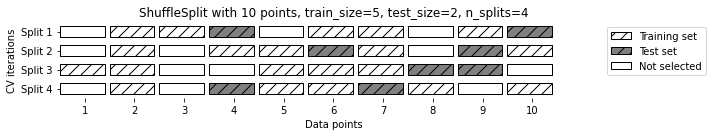

In [18]:
mglearn.plots.plot_shuffle_split()

In [19]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=0.5, train_size=0.5, n_splits=10)
logreg = LogisticRegression()
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
scores

array([0.96 , 0.96 , 0.973, 0.96 , 0.973, 0.973, 0.973, 0.933, 0.92 ,
       0.973])

El shuffle-split CV nos permite controlar el número de iteraciones independientemente del tamaño del training y del test.

## Ejemplo (stratified k-fold CV)

In [20]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

#### Modelo básico (sin CV)

In [21]:
# Método de la exclusión
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target,
                                                    test_size=0.2,
                                                    random_state=42)

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


pipe_logreg = Pipeline([("scaler", StandardScaler()),
                        ("pca", PCA(n_components=2)),
                        ("clf", LogisticRegression(random_state=42))])

In [23]:
pipe_logreg.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('clf', LogisticRegression(random_state=42))])

In [24]:
pipe_logreg.score(X_test, y_test)

0.9912280701754386

In [25]:
y_pred = pipe_logreg.predict(X_test)

#### Modelo con CV (stratified k-fold CV)

In [26]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

kfold = StratifiedKFold(n_splits=10, shuffle=True, 
                        random_state=42).split(X_train,y_train)

In [27]:
kfold

<generator object _BaseKFold.split at 0x000002854A199D60>

In [28]:
scores = []

for k, (train,test) in enumerate(kfold):
    pipe_logreg.fit(X_train[train], y_train[train])
    score = pipe_logreg.score(X_train[test], y_train[test])
    scores.append(score)
    
    print("Fold #{}, Tamaño:{}, Acc:{}".format(k+1, 
                                           np.bincount(y_train[train]), 
                                               score))

Fold #1, Tamaño:[152 257], Acc:0.9565217391304348
Fold #2, Tamaño:[152 257], Acc:0.9565217391304348
Fold #3, Tamaño:[152 257], Acc:0.9782608695652174
Fold #4, Tamaño:[152 257], Acc:0.8913043478260869
Fold #5, Tamaño:[152 257], Acc:0.9565217391304348
Fold #6, Tamaño:[153 257], Acc:0.9111111111111111
Fold #7, Tamaño:[152 258], Acc:0.9777777777777777
Fold #8, Tamaño:[152 258], Acc:0.8444444444444444
Fold #9, Tamaño:[152 258], Acc:0.9555555555555556
Fold #10, Tamaño:[152 258], Acc:1.0


In [29]:
print("Mean Acc CV: {} +/- {}".format(np.mean(scores), np.std(scores)))

Mean Acc CV: 0.9428019323671497 +/- 0.04450856538189642


## Diagnóstico de algoritmos con curvas de aprendizaje

### Diagnóstico del problema del sesgo y varianza con curvas de aprendizaje

In [30]:
from sklearn.model_selection import learning_curve

pipe_logreg = Pipeline([("scaler", StandardScaler()),
                        ("clf", LogisticRegression(penalty="l2",
                                                   random_state=42,
                                                   max_iter=1000))])

In [31]:
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_logreg, 
                                                        X=X_train,
                                                        y=y_train,
                                                       train_sizes=np.linspace(0.1,1,10),
                                                        cv = 10,
                                                        n_jobs=-1,
                                                        verbose=4)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

[learning_curve] Training set sizes: [ 40  81 122 163 204 245 286 327 368 409]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of 100 | elapsed:    3.2s remaining:   11.1s
[Parallel(n_jobs=-1)]: Done  49 out of 100 | elapsed:    3.4s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  75 out of 100 | elapsed:    3.5s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.6s finished


In [32]:
train_sizes

array([ 40,  81, 122, 163, 204, 245, 286, 327, 368, 409])

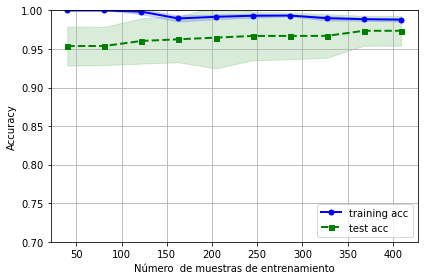

In [33]:
plt.plot(train_sizes, train_mean, color="blue", marker="o",
         markersize=5, label="training acc")

plt.fill_between(train_sizes, train_mean+train_std, train_mean-train_std,
                alpha=0.15, color="blue")

plt.plot(train_sizes, test_mean, color="green", linestyle="--", marker="s",
         markersize=5, label="test acc")

plt.fill_between(train_sizes, test_mean+test_std, test_mean-test_std,
                alpha=0.15, color="green")

plt.grid()
plt.xlabel("Número  de muestras de entrenamiento")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.ylim([0.7,1.0])
plt.tight_layout()
plt.show()

### Diagnóstico del sobreajuste con curvas de validación

In [34]:
from sklearn.model_selection import validation_curve

C_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

train_scores, test_scores = validation_curve(estimator=pipe_logreg, 
                                             X=X_train,
                                             y=y_train,
                                             param_name="clf__C",
                                             param_range=C_range,
                                             cv=10,
                                             n_jobs=-1,
                                             verbose=4)


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  60 | elapsed:    0.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  29 out of  60 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  45 out of  60 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.3s finished


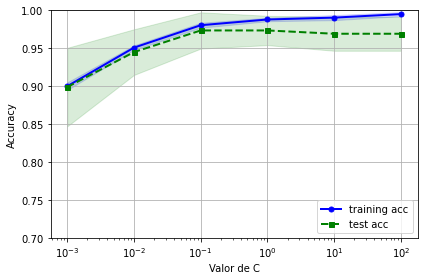

In [35]:
plt.plot(C_range, train_mean, color="blue", marker="o",
         markersize=5, label="training acc")

plt.fill_between(C_range, train_mean+train_std, train_mean-train_std,
                alpha=0.15, color="blue")

plt.plot(C_range, test_mean, color="green", linestyle="--", marker="s",
         markersize=5, label="test acc")

plt.fill_between(C_range, test_mean+test_std, test_mean-test_std,
                alpha=0.15, color="green")

plt.grid()
plt.xlabel("Valor de C")
plt.xscale("log")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.ylim([0.7,1.0])
plt.tight_layout()
plt.show()

## Grid Search

### Simple grid search (naive grid search)

Forma de encontrar los mejores hiperparámetro de una forma manual con for loops.

In [36]:
from sklearn.datasets import load_iris

iris = load_iris()

In [37]:
# método de la exclusión

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                   random_state=0)

In [38]:
from sklearn.svm import SVC

In [39]:
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # Para cada combinación de parámetros, entrenamos un SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluar el SVC en el test set
        score = svm.score(X_test,y_test)
        # Si tenemos un mejor score, guardamos el score y los parámetros
        if score > best_score:
            best_score = score
            best_parameters = {"C": C, "gamma":gamma}
            
print("Mejor score {:.2f}".format(best_score))
print("Mejores parámetros {}".format(best_parameters))

Mejor score 0.97
Mejores parámetros {'C': 100, 'gamma': 0.001}


Hemos probado muchos valores para nuestros hiperparámetros y seleccionado los que nos dan un mejor accuracy en el test set, sin embargo este accuracy puede no generalizar a nuevos datos. Esto es debido a que hemos usado (aunque no parezca) los datos de prueba para ajustar los hiperparámetros, y entonces no podemos estar seguros de cuan bueno es el modelo (esto se llama data leakage en machine learning).

Por lo tanto es recomendado un tercer dataset, que nos permita entrenar y probar, y dejar el test set solo para pruebas finales. Este dataset lleva el nombre de validation set, y existe para escoger los mejores hiperparámetros del modelo, y dejar el dataset de prueba para evaluar el performance final del modelo.

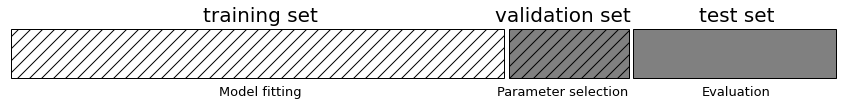

In [40]:
mglearn.plots.plot_threefold_split()

In [41]:
# partir los datos en train+validation sets y test set
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data,
                                                         iris.target,
                                                         random_state=0)
# partir los datos de train+validation en training y validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, 
                                                      y_trainval,
                                                      random_state=1)

print(X_train.shape[0])
print(X_valid.shape[0])
print(X_test.shape[0])

84
28
38


In [42]:
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # Para cada combinación de parámetros, entrenamos un SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluar el SVC en el validation set
        score = svm.score(X_valid,y_valid)
        # Si tenemos un mejor score, guardamos el score y los parámetros
        if score > best_score:
            best_score = score
            best_parameters = {"C": C, "gamma":gamma}
            
# Reconstruir el modelo con la combinación de training y validation, 
# y evaluarlo con el test set
svm = SVC(**best_parameters)
svm.fit(X_trainval,y_trainval)
test_score = svm.score(X_test,y_test)

print("Mejor score en validation {:.2f}".format(best_score))
print("Mejores parámetros {}".format(best_parameters))
print("Mejor score en test con los mejores parámetros {:.2f}".format(test_score))

Mejor score en validation 0.96
Mejores parámetros {'C': 10, 'gamma': 0.001}
Mejor score en test con los mejores parámetros 0.92


## Grid Search con Cross-Validation (forma preferida)

La idea de este método es utilizar un cross-validation dentro de la búsqueda de hiperparámetros para aumentar las capacidades de generalización del modelo, y en vez de utulizar una simple partición entre traning y validation, podemos usar cross-validation para evaluar el performance de cada combinación de hiperparámetros.

In [43]:
# método de la exclusión

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                   random_state=0)

In [44]:
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # Para cada combinación de parámetros entrenamos un SVC
        svm = SVC(gamma=gamma, C=C)
        # hacer un cross-validation
        scores = cross_val_score(svm, X_train, y_train, cv=5)
        # calcular la media del accuracy del cross-validation
        score = np.mean(scores)
        # Si tenemos un mejor score, guardamos el score y los parámetros
        if score > best_score:
            best_score = score
            best_parameters = {"C": C, "gamma":gamma}

# reconstruir el modelo con los mejores hiperparámetros y evaluo performance
# con el test set

svm = SVC(**best_parameters)
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

0.9736842105263158

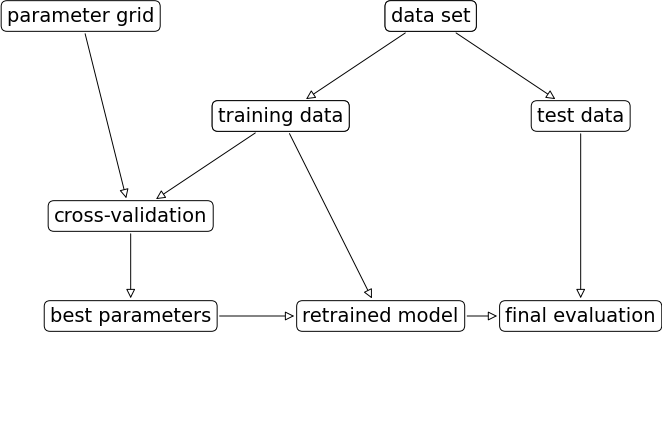

In [45]:
mglearn.plots.plot_grid_search_overview()

### GridSearchCV

In [46]:
# método de la exclusión

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                   random_state=0)

In [47]:
param_grid = {"C": [0.001,0.01,0.1,1,10,100], 
              "gamma": [0.001,0.01,0.1,1,10,100]}

In [48]:
from sklearn.model_selection import GridSearchCV #estimator
from sklearn.svm import SVC

gs = GridSearchCV(SVC(), param_grid, cv=5)

In [49]:
gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [50]:
# score en el test set
gs.score(X_test,y_test)

0.9736842105263158

In [51]:
# Mejores parámetros
gs.best_params_

{'C': 10, 'gamma': 0.1}

In [52]:
gs

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [53]:
gs.best_estimator_

SVC(C=10, gamma=0.1)

In [61]:
SVC_best =  gs.best_estimator_

In [62]:
SVC_best.score(X_test, y_test)

0.9736842105263158

### Analizando resultados del GS con el CV

In [54]:
results =pd.DataFrame(gs.cv_results_)[["param_C","param_gamma","mean_test_score",
                             "std_test_score"]]

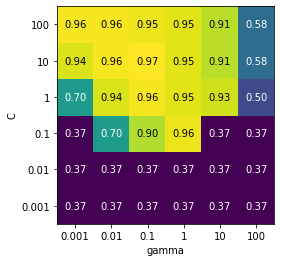

In [55]:
# Mostrar los accuracies como un mapa de calor

scores = np.array(results.mean_test_score).reshape(6,6)

mglearn.tools.heatmap(scores, xlabel="gamma", ylabel="C",
                      xticklabels=param_grid["gamma"],
                      yticklabels=param_grid["C"],
                      cmap="viridis")

## Búsqueda sobre espacios no solo grids 

In [63]:
param_grid = [{"kernel":["rbf"],
               "C": [0.001,0.01,0.1,1,10,100],
               "gamma": [0.001,0.01,0.1,1,10,100]},
              {"kernel": ["linear"],
               "C": [0.001,0.01,0.1,1,10,100]}]

In [64]:
gs = GridSearchCV(SVC(), param_grid, cv=5)
gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['rbf']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['linear']}])

In [65]:
# Mejores parámetros
gs.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [66]:
gs.best_score_

0.9731225296442687

In [67]:
pd.DataFrame(gs.cv_results_).T

,0,1,2,3,...,38,39,40,41
mean_fit_time,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0
std_fit_time,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0
mean_score_time,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0
std_score_time,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0
param_C,0.0,0.0,0.0,0.0,...,0.1,1,10,100
param_gamma,0.0,0.01,0.1,1,...,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,...,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.35,0.35,0.35,0.35,...,1.0,1.0,1.0,0.96
split1_test_score,0.35,0.35,0.35,0.35,...,0.91,0.96,1.0,0.96


## Random Grid-Search con CV

In [68]:
# método de la exclusión

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                   random_state=0)

In [69]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [70]:
param_grid = {"criterion": ["entropy", "giny"], 
              "max_depth": [2,4,6],
              "min_samples_leaf": [4,8,10],
              "max_features": ["auto", "sqrt"],
              "n_estimators": [10,20,100,200]}

Toma algunos parametros de manera aleatoria, las combinaciones que quepan en n_iter corridas.

In [71]:
clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator=clf, param_distributions=param_grid,
                          n_iter=10, cv=4, verbose=4, random_state=42)
model.fit(X_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits
[CV 1/4] END criterion=giny, max_depth=4, max_features=sqrt, min_samples_leaf=10, n_estimators=20;, score=nan total time=   0.0s
[CV 2/4] END criterion=giny, max_depth=4, max_features=sqrt, min_samples_leaf=10, n_estimators=20;, score=nan total time=   0.0s
[CV 3/4] END criterion=giny, max_depth=4, max_features=sqrt, min_samples_leaf=10, n_estimators=20;, score=nan total time=   0.0s
[CV 4/4] END criterion=giny, max_depth=4, max_features=sqrt, min_samples_leaf=10, n_estimators=20;, score=nan total time=   0.0s
[CV 1/4] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=8, n_estimators=200;, score=0.893 total time=   0.2s
[CV 2/4] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=8, n_estimators=200;, score=1.000 total time=   0.2s
[CV 3/4] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=8, n_estimators=200;, score=1.000 total time=   0.2s
[CV 4/4] END criterio

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['entropy', 'giny'],
                                        'max_depth': [2, 4, 6],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [4, 8, 10],
                                        'n_estimators': [10, 20, 100, 200]},
                   random_state=42, verbose=4)

In [72]:
model.best_params_

{'n_estimators': 200,
 'min_samples_leaf': 8,
 'max_features': 'sqrt',
 'max_depth': 2,
 'criterion': 'entropy'}

In [73]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

predictions = model.best_estimator_.predict(X_test)
print(confusion_matrix(y_test,predictions))
print("\n")
print(classification_report(y_test, predictions))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

